In [56]:
%load_ext autoreload

%autoreload 2
from utils import parse_table
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Grayscale

Parse the grayscale likelihoods table

In [43]:
df = pd.read_csv('tables/likelihood-comparison/grayscale_likelihoods.csv')
all_tasks = parse_table(df)

3/5: 100%|██████████| 4/4 [00:48<00:00, 12.07s/it]


write down all the tasks and the number of datapoints for each

In [44]:
for A in all_tasks.keys():
    for B in all_tasks[A].keys():
        print(f"{A} vs {B}: {len(all_tasks[A][B])}")

omniglot vs mnist: 67840
omniglot vs fashion-mnist: 67840
omniglot vs emnist: 67840
fashion-mnist vs mnist: 72984
fashion-mnist vs emnist: 82984
fashion-mnist vs omniglot: 56840
mnist vs fashion-mnist: 72992
mnist vs emnist: 82992
mnist vs omniglot: 56848
emnist vs mnist: 83984
emnist vs fashion-mnist: 83984
emnist vs omniglot: 67840


## Likelihood Comparisons

These files relate to the log-likelihood plots in the pathologies figure of the paper alongside some extra plots for the appendix.

### Fashion-vs-mnist-omniglot

In [60]:
df = all_tasks['fashion-mnist']['mnist']

mnist_values = df[df['name'] == 'ood']['log_likelihoods'].values
df = all_tasks['fashion-mnist']['omniglot']
omniglot_values = df[df['name'] == 'ood']['log_likelihoods'].values

in_values = np.concatenate([df[df['name'] == 'test']['log_likelihoods'].values, df[df['name'] == 'train']['log_likelihoods'].values])
generated_values = df[df['name'] == 'generated']['log_likelihoods'].values

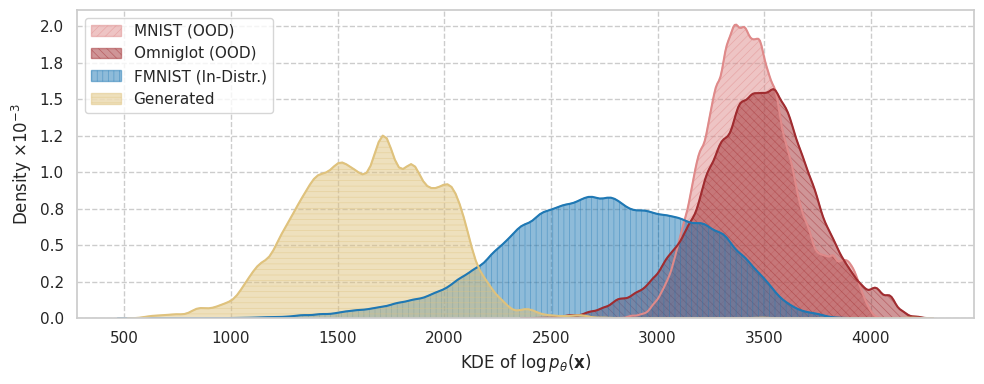

In [102]:
from pretty import plot_histogram, ColorTheme, plot_kde

plot_kde(
    x_values= [
        mnist_values,
        omniglot_values,
        in_values,
        generated_values
    ],
    labels = [
        "MNIST (OOD)",
        "Omniglot (OOD)",
        "FMNIST (In-Distr.)",
        "Generated",
    ],
    colors = [
        ColorTheme.OOD_SECONDARY.value,
        ColorTheme.OOD.value,
        ColorTheme.IN_DISTR.value,
        ColorTheme.GENERATED.value,
    ],
    
    x_label='KDE of $\\log p_\\theta(\\mathbf{x})$',
    scale=3,
    binwidth=25,
    figsize=(10, 4),
    legend_loc='upper left'
)

### Mnist-vs-FMNIST-omniglot

In [105]:
df = all_tasks['mnist']['fashion-mnist']

fmnist_values = df[df['name'] == 'ood']['log_likelihoods'].values
df = all_tasks['mnist']['omniglot']
omniglot_values = df[df['name'] == 'ood']['log_likelihoods'].values

in_values = np.concatenate([df[df['name'] == 'test']['log_likelihoods'].values, df[df['name'] == 'train']['log_likelihoods'].values])
generated_values = df[df['name'] == 'generated']['log_likelihoods'].values

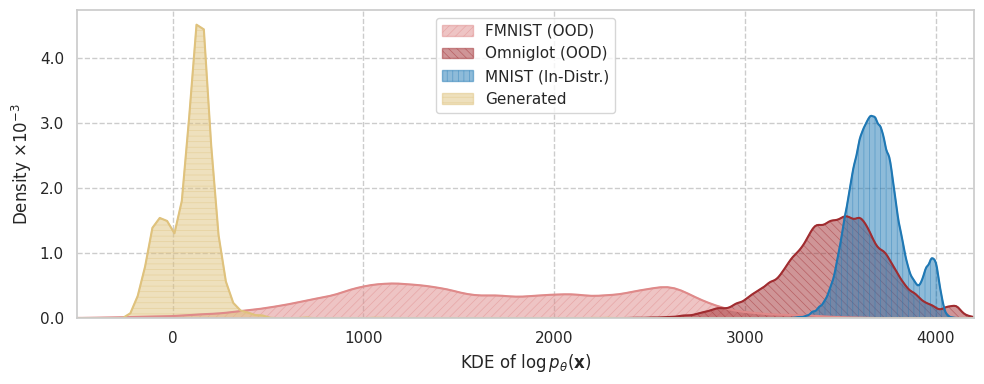

In [109]:
from pretty import plot_histogram, ColorTheme, plot_kde

plot_kde(
    x_values= [
        mnist_values,
        omniglot_values,
        in_values,
        generated_values
    ],
    labels = [
        "FMNIST (OOD)",
        "Omniglot (OOD)",
        "MNIST (In-Distr.)",
        "Generated",
    ],
    colors = [
        ColorTheme.OOD_SECONDARY.value,
        ColorTheme.OOD.value,
        ColorTheme.IN_DISTR.value,
        ColorTheme.GENERATED.value,
    ],
    
    x_label='KDE of $\\log p_\\theta(\\mathbf{x})$',
    scale=3,
    binwidth=25,
    figsize=(10, 4),
    legend_loc='upper center',
    xlim=(-500, 4200)
)

## TINY Imagenet

In [110]:
df = pd.read_csv('tables/likelihood-comparison/rgb_likelihoods.csv')
all_tasks = parse_table(df)

4/6: 100%|██████████| 5/5 [01:30<00:00, 18.16s/it]


In [111]:
for A in all_tasks.keys():
    for B in all_tasks[A].keys():
        print(f"{A} vs {B}: {len(all_tasks[A][B])}")

cifar100 vs celeba-small: 53448
cifar100 vs tiny-imagenet: 83984
cifar100 vs cifar10: 83984
cifar100 vs svhn: 83984
celeba-small vs cifar100: 53448
celeba-small vs tiny-imagenet: 53448
celeba-small vs cifar10: 93448
celeba-small vs svhn: 53448
tiny-imagenet vs cifar100: 83984
tiny-imagenet vs celeba-small: 53448
tiny-imagenet vs cifar10: 123984
tiny-imagenet vs svhn: 83984
cifar10 vs cifar100: 83984
cifar10 vs celeba-small: 53448
cifar10 vs tiny-imagenet: 83984
cifar10 vs svhn: 83984
svhn vs cifar100: 83984
svhn vs celeba-small: 53448
svhn vs tiny-imagenet: 83984
svhn vs cifar10: 123984


In [113]:
df = all_tasks['tiny-imagenet']['celeba-small']

celeba_values = df[df['name'] == 'ood']['log_likelihoods'].values
df = all_tasks['tiny-imagenet']['celeba-small']
omniglot_values = df[df['name'] == 'ood']['log_likelihoods'].values

in_values = np.concatenate([df[df['name'] == 'test']['log_likelihoods'].values, df[df['name'] == 'train']['log_likelihoods'].values])
generated_values = df[df['name'] == 'generated']['log_likelihoods'].values

In [ ]:
from pretty import plot_histogram, ColorTheme, plot_kde

plot_kde(
    x_values= [
        mnist_values,
        omniglot_values,
        in_values,
        generated_values
    ],
    labels = [
        "FMNIST (OOD)",
        "Omniglot (OOD)",
        "MNIST (In-Distr.)",
        "Generated",
    ],
    colors = [
        ColorTheme.OOD_SECONDARY.value,
        ColorTheme.OOD.value,
        ColorTheme.IN_DISTR.value,
        ColorTheme.GENERATED.value,
    ],
    
    x_label='KDE of $\\log p_\\theta(\\mathbf{x})$',
    scale=3,
    binwidth=25,
    figsize=(10, 4),
    legend_loc='upper center',
    xlim=(-500, 4200)
)